<a href="https://colab.research.google.com/github/PoserioJed/POSERIO_CCMACLRL_EXERCISES/blob/main/midterm/MidetermsExam_Poserio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training R²: 0.8450
Validation R²: 0.8449


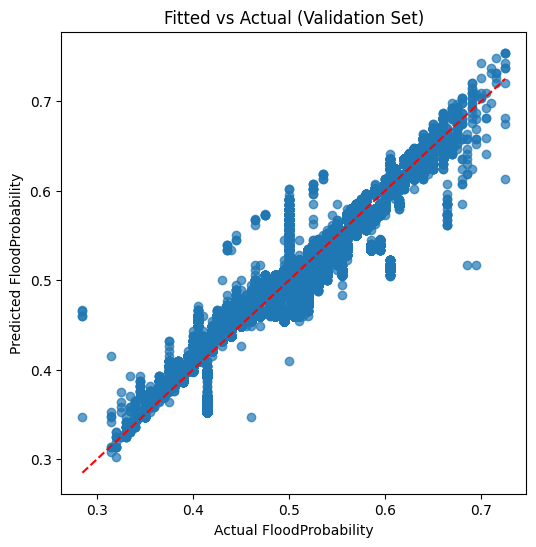

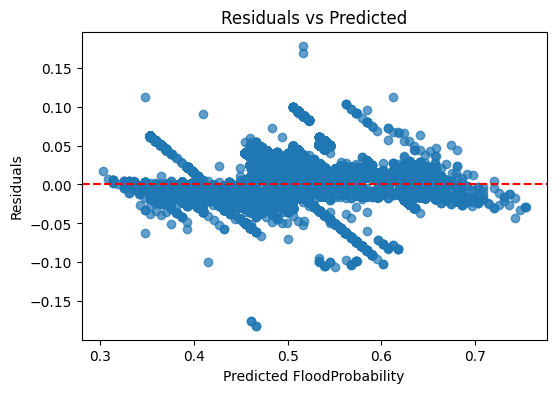

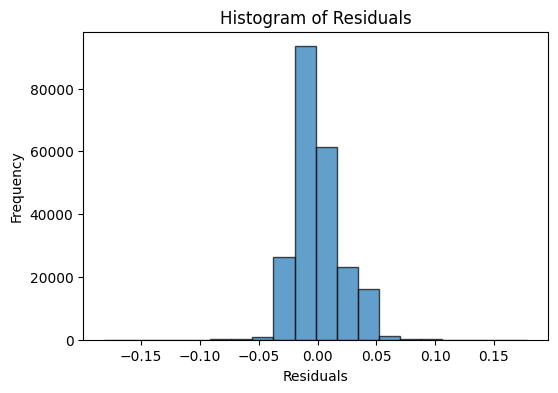

✅ Submission file created: submission_file.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


X = train_df.drop(columns=["FloodProbability", "id"], errors="ignore")
y = train_df["FloodProbability"]


X_test = test_df.drop(columns=["id"], errors="ignore")


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training R²: {train_r2:.4f}")
print(f"Validation R²: {val_r2:.4f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.title("Fitted vs Actual (Validation Set)")
plt.show()


residuals = y_val - y_val_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_val_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FloodProbability")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


model.fit(X, y)


test_predictions = model.predict(X_test)

submission_df = pd.DataFrame({
    "id": test_df["id"],
    "FloodProbability": test_predictions
})

submission_df.to_csv("submission_file.csv", index=False)
print("✅ Submission file created: submission_file.csv")


